# Pandas Basic 2

In [39]:
# from images import bigpycraft_bda as bpc
from IPython.display import Image 
table5_4 = './images/table5-4.png'

from pandas import Series, DataFrame
import pandas as pd
import numpy as np

## 2. Essential funcionality
> 핵심 기능
> - Series나 DataFrame에 저장된 데이터를 다루는 방법

### Reindexing

In [3]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [4]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [5]:
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

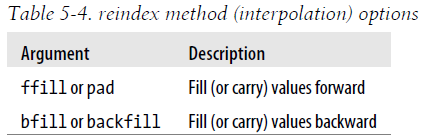

In [40]:
# reindex 메소드(보간) 옵션
Image(table5_4)

In [7]:
# ffill 메소드 : 앞의 값으로 누락된 값을 채워 넣기
obj3 = Series(['blue','purple','yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

 - 0, 2, 4 번째 열에 각각 blue, purple, yellow가 입력되어 있으므로, 1,3,5 번째 열에는 원래 NaN값이 들어가야 하지만, 각각 앞에 있는 열의 값으로 누락된 값을 채워넣게 된다.

In [16]:
frame = DataFrame(np.arange(9).reshape((3,3)), index = ['a', 'c', 'd'],
                  columns=['Ohio','Texas','California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [10]:
frame2 = frame.reindex(['a','b','c','d'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


\# Question. 음~ 왜 float 형으로 바뀌지???

In [17]:
# states = ['California', 'Ohio', 'Oregon', 'Texas']
# states

['California', 'Ohio', 'Oregon', 'Texas']

In [18]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns = states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [19]:
frame.reindex(index=['a','b','c','d'], columns=states)

,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


In [20]:
frame.loc[['a','b','c','d'], states]

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


In [21]:
# 재색인 함수 인자
Image(bpc.Table5_5, width=600)

NameError: name 'Image' is not defined

### Dropping entries from an axis
> 하나의 로우 또는 칼럼 삭제하기
> - 색인 배열 또는 삭제하려는 로우나 칼럼이 제외된 리스트를 이미 가지고 있다면 쉽게 삭제 가능한데...
- 이 방법은 데이터의 모양을 변경하는 작업이 필요하다.
- drop 메소드를 사용하면 선택한 값이 삭제된 새로운 객체를 얻을 수 있다.
- 칼럼 삭제 : drop( [칼럼명], axis=1)
- 로우 삭제 : drop( [로우명], axis=0) or drop( [로우명] ) </font>

In [22]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

- obj.drop을 실행했다고 해도 실제 obj값에서 삭제되는 것이 아니라, 'c'를 드랍한 결과값을 메시지 상에 올려놓는 것뿐이다.

In [23]:
obj.drop(['d', 'c'])


a    0.0
b    1.0
e    4.0
dtype: float64

In [24]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

- 앞서 말한대로, drop명령을 사용한 경우에는 대상 요소를 삭제한 결과값을 올려놓는 것뿐이지 실제로 원본 데이터를 변경하는 것이 아니므로 obj를 실행하면 모든 열이 나오는 것이다.

In [36]:
data = DataFrame(np.arange(16).reshape((4,4)), index=['Ohio','Colorado','Utah','New York'],
                 columns = ['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [38]:
? np.reshape((4,4))

In [27]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


[Note] axis=1 denotes that we are referring to a column, not a row 

In [34]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [33]:
data.drop(['two','four'], axis=1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


### Indexing, selection, and filtering
> 색인하기, 선택하기, 거르기
> - Series의 색인(obj[...])은 NumPy 배열의 색인과 유사하게 동작하는데,
- Series의 색인은 정수가 아니어도 된다는 점이 다르다.
- 또한 라벨이름으로 슬라이싱하는 것은 시작점과 끝점을 포함한다는 것이 파이썬과 다른점이다.

In [43]:
obj = Series(np.arange(4.), index=['a','b','c','d'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [44]:
obj['b']

1.0

In [45]:
obj[1]

1.0

In [46]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [48]:
obj[['b','a','d']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [55]:
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [49]:
obj[[1,3]]

b    1.0
d    3.0
dtype: float64

In [51]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

### 라벨이름으로 슬라이싱 할 경우, 끝점도 포함한다.

In [53]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [54]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

- index로 했을 경우에는 끝 숫자에 해당하는 열은 포함이 안되지만, 라벨이름으로 슬라이싱 하는 경우에는 끝열도 포함을 한다.

In [56]:
data = DataFrame(np.arange(16).reshape((4,4)), index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns = ['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [57]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [58]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [59]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [60]:
# 요건 문법적으로 모순이 있으나, 실용성에 기인한 것일뿐
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [61]:
data[data < 5] = 0

In [62]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [63]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [64]:
data.ix[['Colorado', 'Utah'], [3, 0, 1]]

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [65]:
data.ix[2]

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [66]:
data.ix[:'Utah', 'two']

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [67]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [68]:
data.ix[data.three > 5, :3]

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


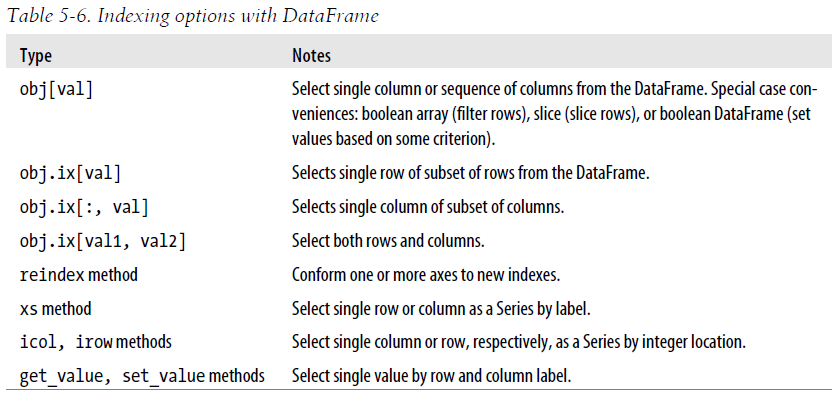

In [71]:
# DataFrame의 값 선택하기
table5_6 = './images/table5-6.png'
Image(table5_6)

### Arithmetic and data alignment
> 산술연산과 데이터 정렬

> - pandas 에서 중요한 기능은 색인이 다른 객체 간의 산술연산이다.
> - 객체를 더할 때 짝이 맞지 않는 색인이 있다면 결과에 두 색인이 통합된다.

In [72]:
s1 = Series([ 7.3, -2.5, 3.4, 1.5],    index=['a', 'c', 'd', 'e'])
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [73]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [74]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [75]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [76]:
df1 = DataFrame(np.arange(9.).reshape((3,3)), columns = list('bcd'),
                index=['Ohio', 'Texas', 'Colorado'])
df2 = DataFrame(np.arange(12.).reshape((4,3)), columns = list('bde'),
               index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [77]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [78]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [80]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


Arithmetic methods with fill values
> 산술연산 메소드에 채워 넣을 값 지정하기

In [81]:
df1 = DataFrame(np.arange(12.).reshape((3,4)), columns=list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4,5)), columns=list('abcde'))

In [82]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [83]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [84]:
df1+df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [85]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [86]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


In [87]:
# 산술연산 메소드
Image(bpc.Table5_7, width=250)

NameError: name 'bpc' is not defined

Operations between DataFrame and Series
> DataFrame과 Series 간의 연산

In [92]:
arr = np.arange(12.).reshape((3,4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [93]:
arr[0]

array([0., 1., 2., 3.])

In [94]:
arr-arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [95]:
frame = DataFrame(np.arange(12.).reshape((4,3)), columns = list('bde'),
                 index =['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [97]:
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [98]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [99]:
series2 = Series(range(3), index=['b','e','f'])
series2

b    0
e    1
f    2
dtype: int64

In [100]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [101]:
series3 = frame['d']
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [102]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [103]:
frame.sub(series3, axis=0)

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


In [104]:
? frame.sub

In [105]:
?fill_value 
# fill_value가 단순히 NaN값에 0을 채우는 것이 아니라, 
# frame.sub같은 함수가 실행되기 위해서, 
# NaN값에 0을 임시로 넣어두고 실행되도록 도와주는 기능을 한다.

Object `fill_value` not found.


### Function application and mapping 
> 함수 적용과 매핑

> - pandas 객체에도 NumPy의 유니버설 함수를 적용할 수 있다.
> - 유니버설 함수 : 배열의 각 원소에 적용되는 메소드

In [108]:
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [109]:
frame

,b,d,e
Utah,0.790731,-1.444442,-0.392022
Ohio,1.622310,0.550343,-0.982967
Texas,0.021980,0.209360,0.088051
Oregon,1.852338,-3.827757,0.078419


In [111]:
np.abs(frame)  # 음수를 양의 수로 바꾸어준다. (절대값 찾는 기능)

,b,d,e
Utah,0.790731,1.444442,0.392022
Ohio,1.622310,0.550343,0.982967
Texas,0.021980,0.209360,0.088051
Oregon,1.852338,3.827757,0.078419


In [112]:
f = lambda x: x.max() - x.min()

In [113]:
frame.apply(f)

b    1.830358
d    4.378100
e    1.071018
dtype: float64

In [114]:
frame.apply(f, axis=1)

Utah      2.235174
Ohio      2.605277
Texas     0.187380
Oregon    5.680095
dtype: float64

In [115]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])

frame.apply(f)

,b,d,e
min,0.021980,-3.827757,-0.982967
max,1.852338,0.550343,0.088051


In [119]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])

frame.apply(f, axis=1)

,min,max
Utah,-1.444442,0.790731
Ohio,-0.982967,1.622310
Texas,0.021980,0.209360
Oregon,-3.827757,1.852338


In [116]:
# 실수값을 문자열 포맷으로 변환
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,0.79,-1.44,-0.39
Ohio,1.62,0.55,-0.98
Texas,0.02,0.21,0.09
Oregon,1.85,-3.83,0.08


In [117]:
frame['e'].map(format)

Utah      -0.39
Ohio      -0.98
Texas      0.09
Oregon     0.08
Name: e, dtype: object

### Sorting and ranking
> 정렬과 순위

In [121]:
obj = Series(range(4), index=['d','a','b','c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [123]:
frame = DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],
                  columns=['d', 'a', 'b', 'c'])
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [124]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [126]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [128]:
obj = Series([4,7,-3,2])
# obj.order()
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [129]:
frame = DataFrame({'b':[4,7,-3,2], 'a' : [0,1,0,1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [130]:
# frame.sort_index(by='b')
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [131]:
frame.sort_values(by=['a','b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [133]:
obj = Series([7,-5,7,4,2,0,4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [134]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [135]:
? obj.rank

In [136]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [137]:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [138]:
frame = DataFrame({'b': [4.3, 7, -3, 2], 
                   'a': [0, 1, 0, 1],
                   'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [139]:
frame.rank(axis=1)

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


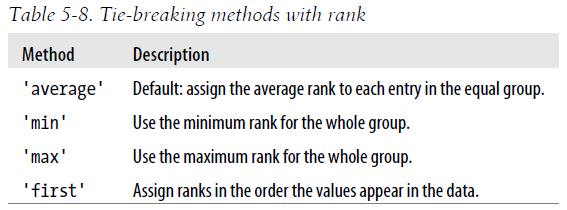

In [141]:
# 순위의 동률을 처리하는 메소드
table5_8 = './images/table5-8.png'
Image(table5_8)

### Axis indexes with duplicate values
> 중복 색인

> - pandas의 많은 함수(reindex 같은)에서 색인 값은 유일해야 하지만, 강제 사항은 아니다.
- 허걱~~~ 중복된 색인값이 있다는 말인데..ㅠ

In [142]:
obj = Series(range(5), index=['a','a','b','b','c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [145]:
obj.index.is_unique

False

In [146]:
obj['a']

a    0
a    1
dtype: int64

In [147]:
obj['c']

4

In [148]:
df = DataFrame(np.random.randn(4,3), index=['a','a','b','b'])
df

,0,1,2
a,-1.712353,0.104534,-1.594053
a,-0.515842,0.041919,2.504312
b,0.967893,1.397340,1.198093
b,0.697752,-0.218851,2.204935


In [149]:
df.loc['b']

,0,1,2
b,0.967893,1.397340,1.198093
b,0.697752,-0.218851,2.204935
